<a href="https://colab.research.google.com/github/audirisper/kamilimu_assignments/blob/Risper_python_libraries_2/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

athletes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/athlete_events.csv")

countries = pd.read_csv("https://raw.githubusercontent.com/google/dspl/master/samples/google/canonical/countries.csv")

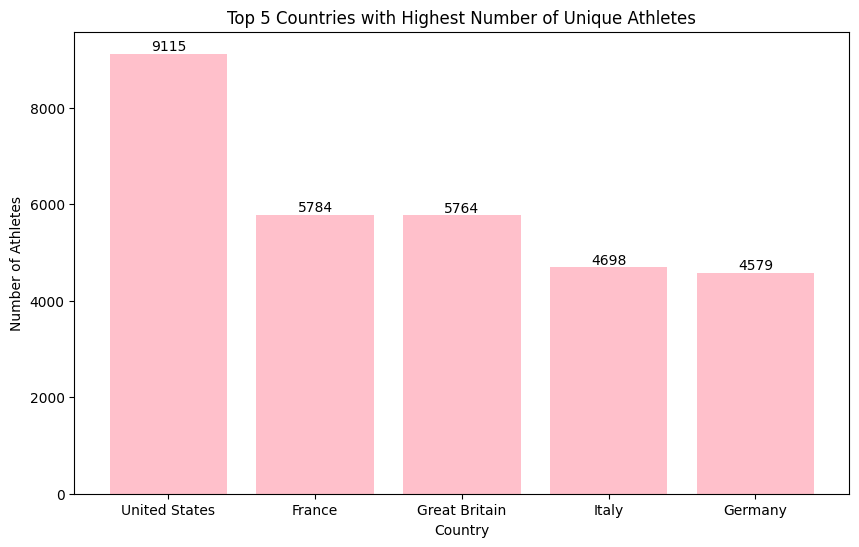

In [3]:
# Count unique athletes per country (Team)
athlete_counts = athletes.groupby("Team")["ID"].nunique().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(athlete_counts.index, athlete_counts.values, color='pink')
plt.title("Top 5 Countries with Highest Number of Unique Athletes")
plt.xlabel("Country")
plt.ylabel("Number of Athletes")

# Display values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.show()


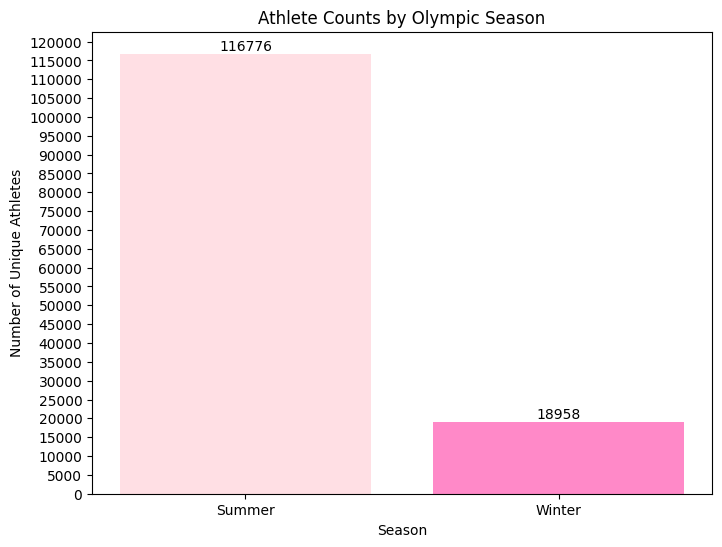

In [4]:
# Count unique athlete IDs per season
season_counts = athletes.groupby("Season")["ID"].nunique()

# Bar chart settings
colors = ["pink" if season == "Summer" else "deeppink" for season in season_counts.index]

plt.figure(figsize=(8, 6))
bars = plt.bar(season_counts.index, season_counts.values, color=colors, alpha=0.5)

# Y-axis ticks from 0 to max in steps of 5000
max_count = season_counts.max()
plt.yticks(range(0, max_count + 5000, 5000))

# Labels and title
plt.title("Athlete Counts by Olympic Season")
plt.xlabel("Season")
plt.ylabel("Number of Unique Athletes")

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height}', ha='center', va='bottom')

plt.show()


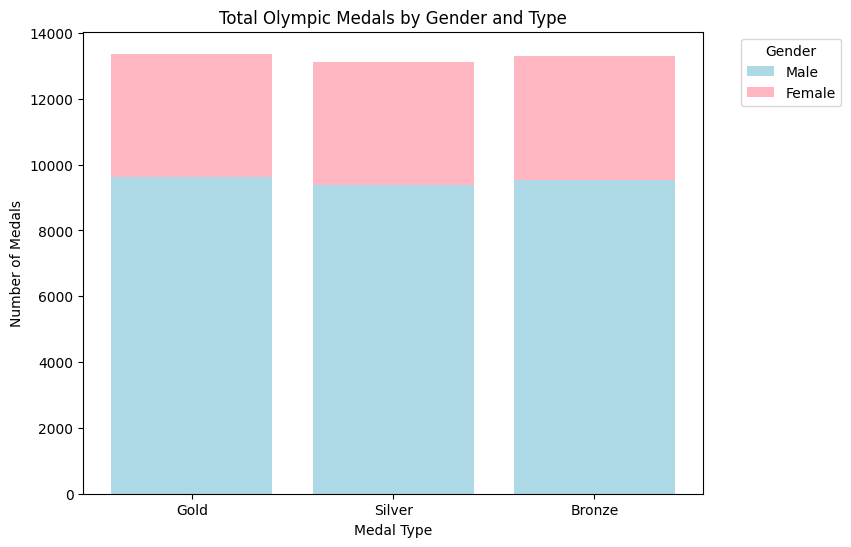

In [5]:
# Filter out only rows where a medal was awarded
medals_df = athletes[athletes["Medal"].notna()]

# Count medals by Medal type and Sex
medal_gender_counts = medals_df.groupby(["Medal", "Sex"]).size().unstack(fill_value=0)

# Reorder rows so medals appear as Gold, Silver, Bronze
medal_gender_counts = medal_gender_counts.reindex(["Gold", "Silver", "Bronze"])

# Plotting
plt.figure(figsize=(8, 6))
bars_male = plt.bar(medal_gender_counts.index, medal_gender_counts["M"], label="Male", color='lightblue')
bars_female = plt.bar(medal_gender_counts.index, medal_gender_counts["F"],
                      bottom=medal_gender_counts["M"], label="Female", color='lightpink')

# Labels
plt.title("Total Olympic Medals by Gender and Type")
plt.xlabel("Medal Type")
plt.ylabel("Number of Medals")

# Move legend to the right
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

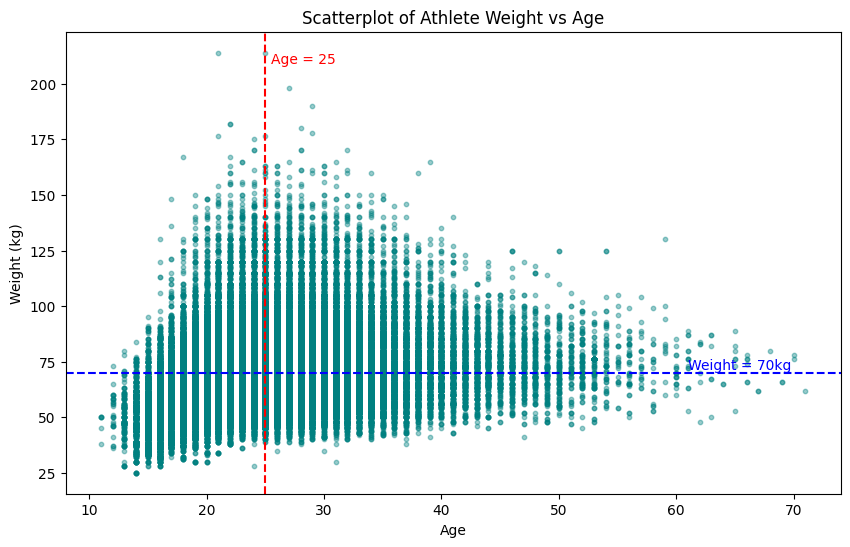

In [6]:
# Drop rows with missing age or weight
filtered = athletes.dropna(subset=["Age", "Weight"])

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(filtered["Age"], filtered["Weight"], alpha=0.4, color='teal', s=10)

# Add vertical line at age = 25
plt.axvline(x=25, color='red', linestyle='--', linewidth=1.5)
plt.text(25.5, filtered["Weight"].max() - 5, 'Age = 25', color='red', fontsize=10)

# Add horizontal line at weight = 70
plt.axhline(y=70, color='blue', linestyle='--', linewidth=1.5)
plt.text(filtered["Age"].max() - 10, 71.5, 'Weight = 70kg', color='blue', fontsize=10)

# Label and title
plt.title("Scatterplot of Athlete Weight vs Age")
plt.xlabel("Age")
plt.ylabel("Weight (kg)")

plt.show()

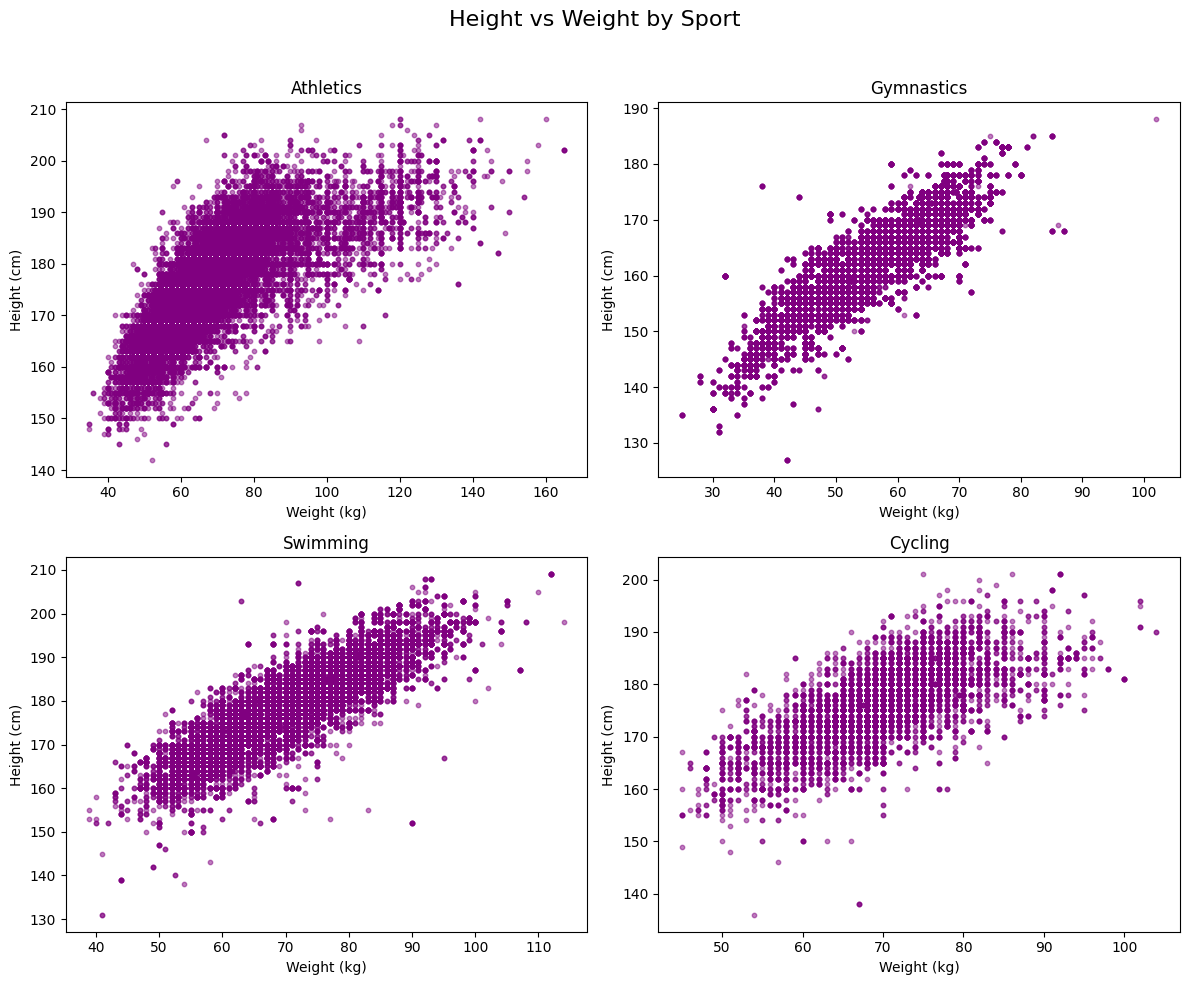

In [7]:
# Filter out rows with missing Height or Weight
filtered = athletes.dropna(subset=["Height", "Weight"])

# Define the sports to visualize
sports = ["Athletics", "Gymnastics", "Swimming", "Cycling"]

# Set up 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Height vs Weight by Sport", fontsize=16)

# Loop through sports and corresponding subplot axes
for sport, ax in zip(sports, axes.flatten()):
    sport_data = filtered[filtered["Sport"] == sport]
    ax.scatter(sport_data["Weight"], sport_data["Height"], alpha=0.5, s=10, color='purple')
    ax.set_title(sport)
    ax.set_xlabel("Weight (kg)")
    ax.set_ylabel("Height (cm)")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for main title
plt.show()

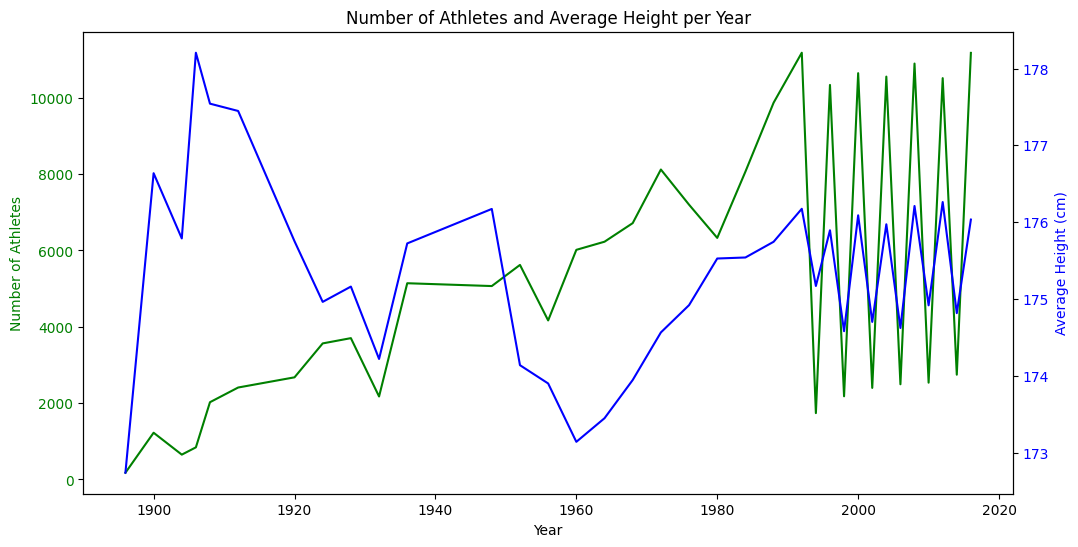

In [9]:
# Drop rows with missing height
filtered = athletes.dropna(subset=["Height"])

# Group data by year
athletes_per_year = athletes.groupby("Year")["ID"].nunique()
avg_height_per_year = filtered.groupby("Year")["Height"].mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot number of athletes
ax1.plot(athletes_per_year.index, athletes_per_year.values, color='green', label='Number of Athletes')
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Athletes", color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create second y-axis for average height
ax2 = ax1.twinx()
ax2.plot(avg_height_per_year.index, avg_height_per_year.values, color='blue', label='Average Height')
ax2.set_ylabel("Average Height (cm)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title
plt.title("Number of Athletes and Average Height per Year")

# Show the plot
plt.show()

SECTION 2 : Seaborn

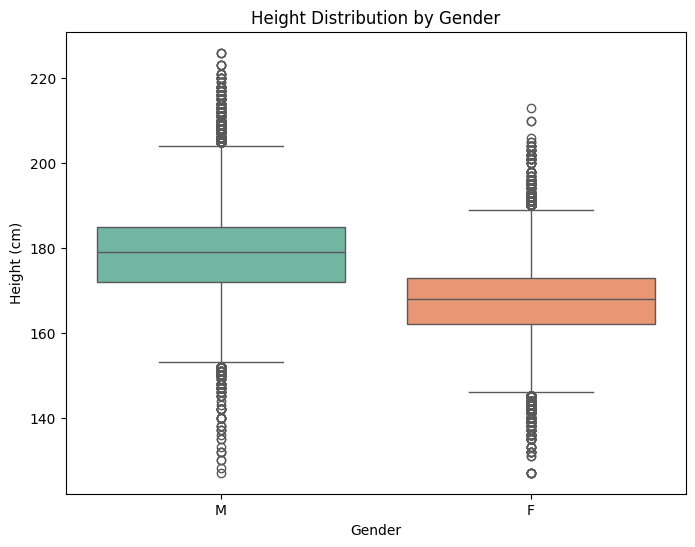

In [13]:
import seaborn as sns

# Drop rows with missing height or sex
filtered = athletes.dropna(subset=["Height", "Sex"])

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sex", y="Height", data=filtered, hue="Sex", palette="Set2")

# Labels and title
plt.title("Height Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Height (cm)")

#show plot
plt.show()

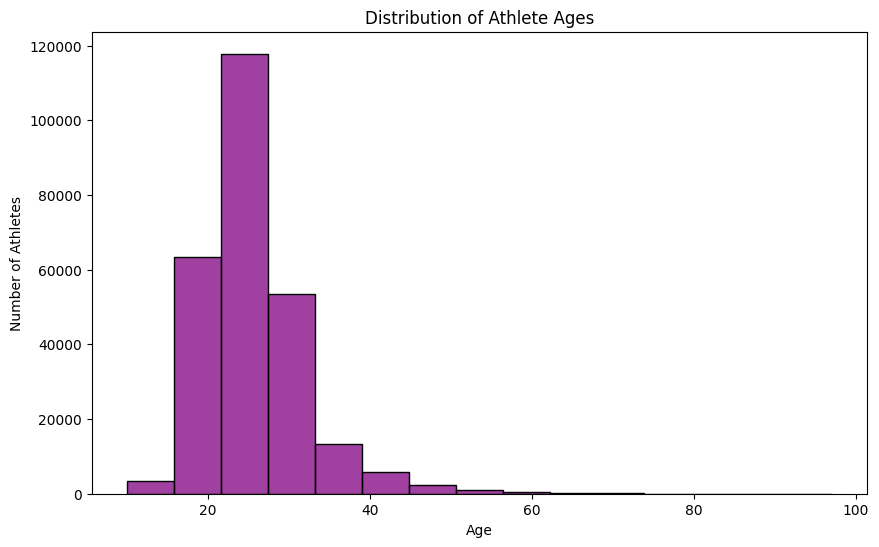

In [15]:
# Drop rows with missing age
filtered = athletes.dropna(subset=["Age"])

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered, x="Age", bins=15, color="purple", edgecolor="black")

# Labels and title
plt.title("Distribution of Athlete Ages")
plt.xlabel("Age")
plt.ylabel("Number of Athletes")

plt.show()

SECTION 3 : Plotly

In [18]:
import plotly.express as px

# Drop rows with missing height
filtered = athletes.dropna(subset=["Height"])

# Filter to the 3 selected sports
sports = ["Basketball", "Volleyball", "Athletics"]
filtered = filtered[filtered["Sport"].isin(sports)]

# Group by Year and Sport, then calculate average height
avg_height = filtered.groupby(["Year", "Sport"])["Height"].mean().reset_index()

# Plot with Plotly
fig = px.line(
    avg_height,
    x="Year",
    y="Height",
    color="Sport",
    title="Average Athlete Height per Year by Sport",
    labels={"Height": "Average Height (cm)", "Year": "Year"},
    markers=True
)

# Show interactive chart
fig.show()

SECTION 4 : Folium

In [25]:
import folium

countries.dropna(subset=["latitude", "longitude"], inplace=True)

# Filter for the target countries
target_countries = ["Kenya", "Uganda", "Burundi", "Rwanda"]
east_africa = countries[countries["name"].isin(target_countries)]

# Create a base map centered near the region
m = folium.Map(location=[np.mean(east_africa.latitude), np.mean(east_africa.longitude)], zoom_start=3)

# Add markers for each country
for _, row in east_africa.iterrows():
    color = "red" if row["name"] == "Kenya" else "gray"
    folium.Marker(
        location=(row["latitude"], row["longitude"]),
        popup=row["name"],
        icon=folium.Icon(color=color)
    ).add_to(m)

# Display the map
m
